In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('out/results.csv')
df

,workers,tasks,time,run
0,3,100,4.554228,1
1,3,100,4.743342,2
2,3,100,4.745010,3
3,3,100,4.639298,4
4,3,100,4.480111,5
...,...,...,...,...
615,33,50,1.600140,6
616,33,50,1.659558,7
617,33,50,1.780965,8
618,33,50,1.712534,9


In [42]:
sns.set_theme(style="darkgrid")

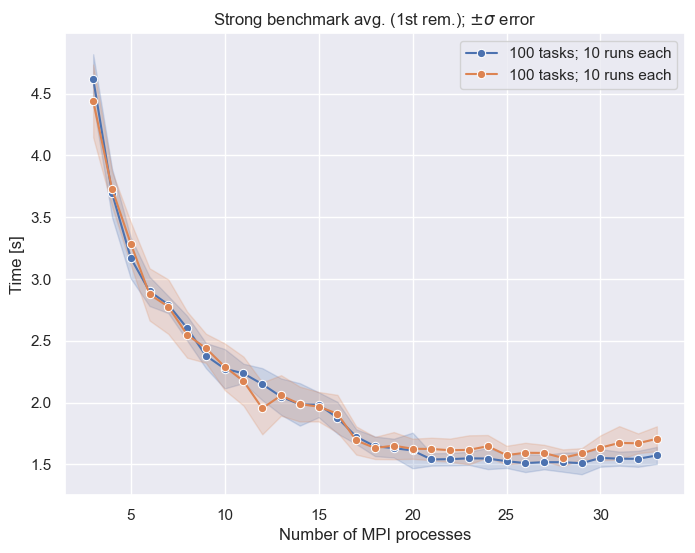

In [43]:
plt.figure(figsize=(8, 6))

def plot_strong(data, label):
    sns.lineplot(x="workers", y="time", data=data, errorbar="sd", marker="o", label=label)

plot_strong(df[df['tasks'] == 100], "100 tasks; 10 runs each")
plot_strong(df[df['tasks'] == 50], "100 tasks; 10 runs each")

plt.xlabel("Number of MPI processes")
plt.ylabel("Time [s]")

# add grid
plt.grid(True)

plt.title(f"Strong benchmark avg. (1st rem.); $\pm\sigma$ error")

plt.savefig(f"../../../report/plots/py_mandel/strong_scaling.svg")
plt.show()

/var/folders/cp/1r3tmfrx0wd8llj7cqxylwyh0000gn/T/ipykernel_7280/2278676067.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["speedup"] = avg_time_single / data["time"]
/var/folders/cp/1r3tmfrx0wd8llj7cqxylwyh0000gn/T/ipykernel_7280/2278676067.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["speedup"] = avg_time_single / data["time"]


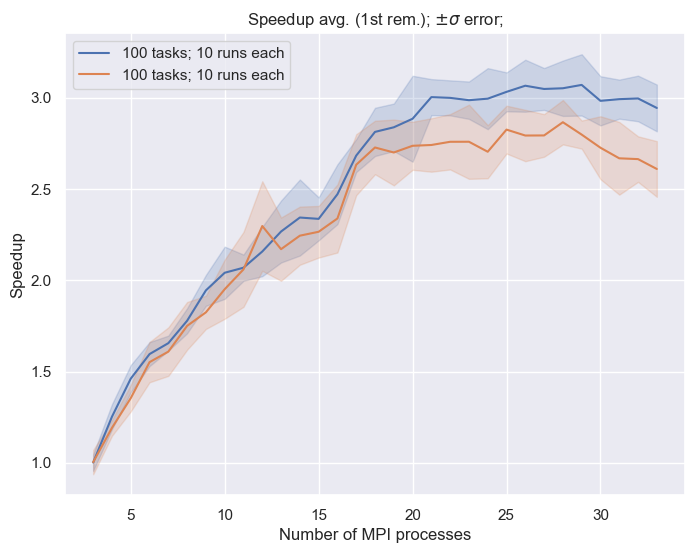

In [46]:
plt.figure(figsize=(8, 6))


def plot_speeup(data, label):
    avg_time_single = data[data["workers"] == 3]["time"].mean()
    # calculate speedup (using avg time of # process)
    data["speedup"] = avg_time_single / data["time"]

    sns.lineplot(
        x="workers",
        y="speedup",
        data=data,
        #marker="o",
        label=label,
        errorbar="sd"
    )


plot_speeup(df[df['tasks'] == 100], "100 tasks; 10 runs each")
plot_speeup(df[df['tasks'] == 50], "100 tasks; 10 runs each")

max_workers = df["workers"].max()

# add speedup line
# plt.plot([1, max_workers], [1, max_workers], linestyle="--",
#         color="orange", label="ideal speedup")

plt.xlabel("Number of MPI processes")
plt.ylabel("Speedup")
plt.legend()
# plt.ylim(0, max_workers + 1)
plt.grid(True)

plt.title(f"Speedup avg. (1st rem.); $\pm\sigma$ error;")

plt.savefig(f"../../../report/plots/py_mandel/speedup.svg")

plt.show()